<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 4 - West Nile Virus Prediction

# Part 4: Recommendation and Conclusions

## Contents:
* [Organisation of Notebooks](#Organisation-of-Notebooks)
* [Import Libraries and Dataset](#Import-Libraries-and-Dataset)
* [Cost Benefit Analysis on the Vector Control strategies employed in Chicago](#Cost-Benefit-Analysis-on-the-Vector-Control-strategies-employed-in-Chicago)
* [Analysis](#Analysis)
* [Conclusion and Recommendation](#Conclusion-and-Recommendation)

## Organistation of Notebooks:
1. [Introduction](./01_Introduction.ipynb)
2. [EDA](./02_EDA.ipynb)
3. [Model Evaluation](./03_Model_Evaluation.ipynb)
4. Recommendation and Conclusion

## Import Libraries and Dataset

In [1]:
# # code to install haversine package for use in the code cell below
# !conda install -c conda-forge haversine -y

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import math
import haversine as hs
from haversine import Unit

In [3]:
#Read in the csv files
spray = pd.read_csv('../data/spray.csv')
train = pd.read_csv('../data/train.csv')

In [4]:
#Create dataframe of spray night coordinates on 25th July 2013 for the analysis later
spray_jul = spray.loc[spray['Date']=='2013-07-25', :]

## Cost Benefit Analysis on the Vector Control strategies employed in Chicago

To analyse whether the actions taken by the Chicago Department of Public Health (CDPH) to limit the population of mosquitoes justify its cost in reducing the spread of the West Nile Virus (WNV), we need to define the costs and benefits:

1. Costs: All the expenses incurred in vector control by CDPH, including monitoring of mosquito traps and spraying of pesticide

2. Benefits: Avoidance of all medical and economic costs associated with contracting the WNV as a result of the vector control methods. These includes inpatient and outpatient costs for treatment and nursing home costs, as well as productivity loss due to missed workdays

We will now attempt to quantify these costs.

### Costs

#### Spraying Cost

The CDPH uses Zenivex E4 for the Vector Control Program which is usually carried out from July to September each year. Based on the spray data, the spray night is carried out once a week. The product is sprayed by a truck-mounted fogger in a process known as Ultra Low Volume (ULV) fogging. The rate of application of the fogging product is 1.5 oz per acre (**375 oz per sq km**) ([*source*](https://www.chicago.gov/content/dam/city/depts/cdph/Mosquito-Borne-Diseases/Zenivex.pdf)).

The price of a **55 gallon (7040 fluid oz)** Zenivex E4 is estimated to be **US\$ 1045** based on 2021 value ([*source*](http://legacy.elpasotexas.gov/purchasing/docs/2016-741%20BID%20TAB.pdf?6/28/2021%209:39:13%20AM)).

The following shows the map of the approximate sprayed area on the 25th July 2013 within the orange rectangle.

The approximate sprayed area on 25th July 2013 is 8.43sqkm.


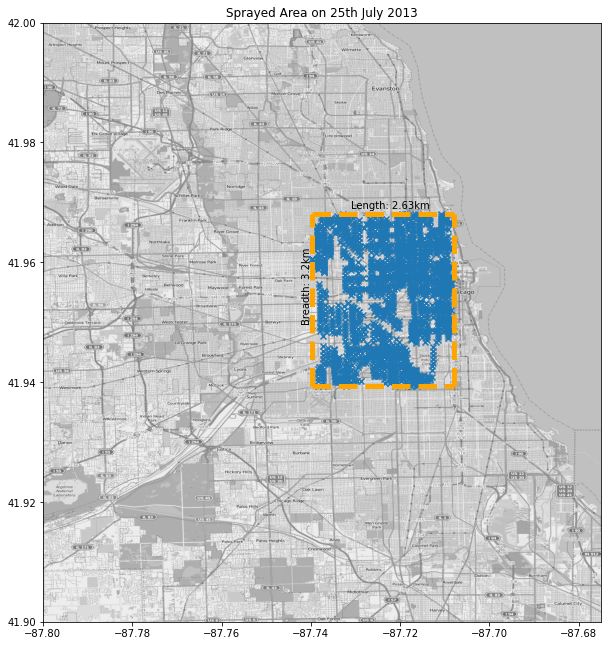

In [5]:
%matplotlib inline

mapdata = np.loadtxt("../data/mapdata_copyright_openstreetmap_contributors.txt")
#spray_jul = pd.read_csv('25thJuly.csv')

aspect = mapdata.shape[0] * 1.0 / mapdata.shape[1]
lon_lat_box = (-87.8, -87.675, 41.9, 42)

plt.figure(figsize=(10,14))
plt.imshow(mapdata, 
           cmap=plt.get_cmap('gray'), 
           extent=lon_lat_box, 
           aspect=aspect)

spray_loc = spray_jul[['Longitude', 'Latitude']].drop_duplicates().values
plt.scatter(spray_loc[:,0], spray_loc[:,1], marker='x')

plt.vlines(x = spray_loc[:,0].min(), 
           ymin = spray_loc[:,1].min(),
           ymax = spray_loc[:,1].max(),
           color='orange',
           linestyle='--',
           linewidth=5
)
plt.vlines(x = spray_loc[:,0].max(), 
           ymin = spray_loc[:,1].min(),
           ymax = spray_loc[:,1].max(),
           color='orange',
           linestyle='--',
           linewidth=5
)
plt.hlines(y = spray_loc[:,1].min(), 
           xmin = spray_loc[:,0].min(),
           xmax = spray_loc[:,0].max(),
           color='orange',
           linestyle='--',
           linewidth=5
)
plt.hlines(y = spray_loc[:,1].max(), 
           xmin = spray_loc[:,0].min(),
           xmax = spray_loc[:,0].max(),
           color='orange',
           linestyle='--',
           linewidth=5
)

length = hs.haversine((spray_loc[:,1].max(), spray_loc[:,0].min()),
                      (spray_loc[:,1].max(), spray_loc[:,0].max()), 
                      unit=Unit.METERS)/1000
        
breadth = hs.haversine((spray_loc[:,1].max(),spray_loc[:,0].max()),
                       (spray_loc[:,1].min(),spray_loc[:,0].max()), 
                       unit=Unit.METERS)/1000

plt.annotate(f'Length: {round(length, 2)}km', (-87.731, 41.969))
plt.annotate(f'Breadth: {round(breadth, 2)}km', (-87.742, 41.95), rotation=90)
plt.title('Sprayed Area on 25th July 2013');

print(f'The approximate sprayed area on 25th July 2013 is {round(length*breadth, 2)}sqkm.')

Assuming every spray night over the 13 weeks from July to September covers the same area as on 25th July 2013, the total cost of the spraying annually is as follows:

In [6]:
# rate of use of Zenivex * total area sprayed per week * cost of Venizen per gallon * 13 weeks(Jul- Sep)
# 375 oz/sqkm * 8.43sqkm * USD1045/7040oz * 13

spray_cost = 375*8.43*1045/7040*13
print(f'The cost of spraying per year is US${round(spray_cost, 2)}')

The cost of spraying per year is US$6100.22


#### Trap Cost

The estimated weekly cost per surveillance unit for mosquito traps is about US\$ 83 (in 2021 value) in California between 2004 to 2012. This includes expenses for field processing, lab processing and testing. We will use the same figure in our analysis. ([*source*](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4340646/)) Since there are 138 traps in the train dataset, the total trap surveillance cost per year is as follows:

In [7]:
# cost of trap surveillance per week * no. of traps * 13 weeks(Jul- Sep)
trap_cost = 83*138*13

print(f'The cost of trap surveillance per year is US${round(trap_cost, 2)}')

The cost of trap surveillance per year is US$148902


#### Total Cost

The total costs of vector control and trap surveillance per year is as follows:

In [8]:
total_cost = spray_cost + trap_cost

print(f'The total cost of vector control and trap surveillance per year is US${round(total_cost, 2)}')

The total cost of vector control and trap surveillance per year is US$155002.22


### Benefits

The costs of any vector control program ideally should reduce the likelihood of citizens contracting WNV and therefore the ensuing the medical and economic costs of contracting the WNV. We will now attempt to quantify these costs.

#### Medical Cost

Depending on the age of the patients, the severity of the illness may vary from mild and self-limiting symptoms similar to influenza to severe conditions affecting the central nervous system.

We will use data from a similar study from California in 2005 to estimate the total medical costs incurred by each patient. In Sacramento, California, 71.8% of WNV cases were mild and influenza-like, while 28.2% of cases developed conditions affecting the central nervous systoem. On average, patients who developed serious conditions spent US\\$ 46551 on inpatient and outpatient treatment, while mild cases incurred US\\$ 167 in medical cost. Taking the weighted average, the amount spend on medical costs due to WNV is US\$ 13247 ([*source:Table 2 and 4*](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3322011/#R5))

In [9]:
wnv_severe = 0.282
wnv_mild = 0.718
med_cost_severe = 46551
med_cost_mild = 167

med_w_av = round(wnv_severe*med_cost_severe + wnv_mild*med_cost_mild)
med_w_av

13247

#### Economic Cost

Patients who contracted the severe form of WNV missed about 50 days of workday on average, according to the same study from California in 2005 This translates to about US\\$ 14777 per case in 2021 value. Mild cases resulted in economic loss of US\\$ 1218 per case. Once again we take the weight average which is US\$ 5042 ([*source:Table 3 and 4*](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3322011/#R5))

In [10]:
eco_cost_severe = 14777
eco_cost_mild = 1218

eco_w_av = round(wnv_severe*eco_cost_severe + wnv_mild*eco_cost_mild)
eco_w_av

5042

#### Number of WNV cases in the Chicago

The number of cases of WNV in Chicago in 2013 is 66 ([*source:Table 2*](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7241786/))

In [11]:
chicago_case = 66

#### Total Cost Avoidance per year

The total medical and economic cost per year is as follows:

In [12]:
# (medical cost per patient + economic cost per patient)* estimated WNV cases in 2013

cost_wnv_pp = med_w_av + eco_w_av # total medical and economic cost per pax
cost_wnv = cost_wnv_pp * chicago_case
print(f'The cost of contracting WNV per case per year is US$ {cost_wnv_pp}')
print(f'The cost of contracting WNV per year is US$ {cost_wnv}')

The cost of contracting WNV per case per year is US$ 18289
The cost of contracting WNV per year is US$ 1207074


## Analysis

In [13]:
case_reduction = (cost_wnv - total_cost)/cost_wnv_pp
print(f'It would take a reduction of {round(case_reduction)} cases for the benefit of the vector control program to outweight the cost of WNV cases')

It would take a reduction of 58 cases for the benefit of the vector control program to outweight the cost of WNV cases


We see that at the present level of expenses for the vector control program, for the benefit of program to outweigh the costs of the WNV cases, the spray events would need to prevent at least 58 cases of WNV. We would need to measure how effective the program is in reducing the number of WNV cases. Unfortunately, there are no available data of WNV cases in Chicago in 2013 on a week by week basis. Another issue would be that not all confirmed cases of WNV were recorded as those who were asymptomatic cases would not see a doctor.

Therefore, we will use the number of mosquitoes caught in the trap as a proxy for measuring WNV cases. 

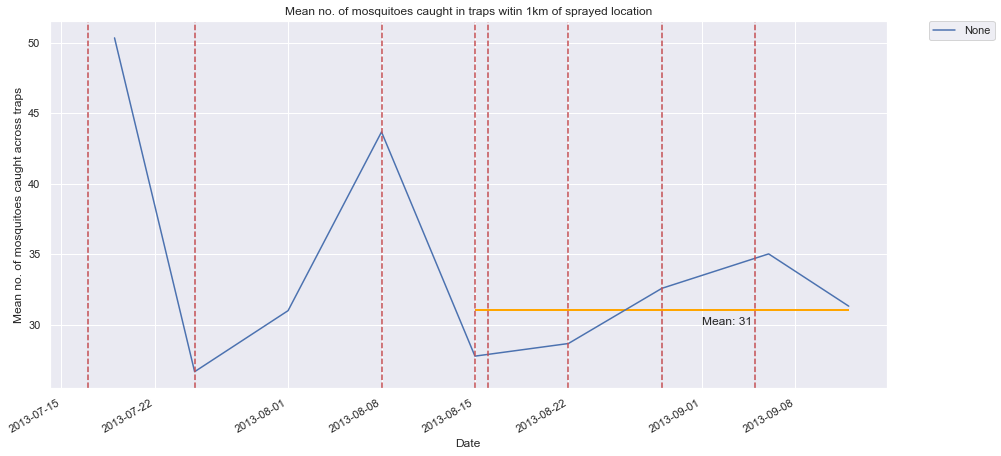

In the plot of number of mosquitoes caught in traps within 1km vs the weeks in 2013 where spraying was carried out, we see that the mean number of mosquitoes was about 51 on 17th July. The fluctuation moderated towards the end of the spraying season in September around a mean of 31 after 15th August. If we assume that the 40% decrease leads to similar percentage decrease in WNV cases, in absolute number it is 0.4 x 66 which is 26 cases. This is still not enough for the benefit of the vector control program to ontweigh the cost of the WNV cases.


## Conclusion and Recommendation

Our selected model XGBoost (Model 18), while already having a high ROC_AUC score of 0.704 on Kaggle, also exhibited a higher sensitivity, which allows the Chicago city officials to target more true positive areas predicted by the model as compared to the next best model.

We may also infer the influence of each features from the feature importance of the XGBoost model. We noted that the month of August, June and September are strong predictors of the WNV. Other strong predictor features include the Culex Territans and Culex Salinarius species of mosquitoes and traps which resides within the DBSCAN cluster -1. 

**Recommendation and Further Study**

The following are our recommendation for further actions:

1. The Chicago Department of Public Health (CDPH) should focus on spraying and monitoring areas where the traps in the DBSCAN cluster -1 and traps T086, T151 and T142 are located as they are strong predictors for WNV cases 


2. Spraying seems to have a short term effect of reducing mosquitoes numbers but it does not help to eradicate sufficient mosquitoes which carry the West Nile Virus


3. There is an ‘Unspecified’ Culex species which is not part of the Train set but exist in the Test set. Further monitoring of this species is required to determine if they are consistent carriers of the WNV


4. The CDPH may have to explore other vector control methods given the inadequacy of the current effort in 2013 which led to 66 cases of VNW in 2013. Suggested methods include the use of larvicide instead of only adulticide such as Zenivex. Outreach efforts would also help to educate the public on how to protect themselves from mosquitoes such as not leaving stagnant water lying around and applying insect repellant. Data from these effort should be used to train another new model for predicting the WNV.
